In [8]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [19]:
import pickle
import pandas as pd
from collections import defaultdict
import re
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
plt.style.use("ggplot")

In [74]:
!ls -lrt ../data/intermediate/ | tail

-rw-r--r--  1 navy  staff      252607 Sep 10 12:53 report_urls1631271189650785000.pickle
-rw-r--r--  1 navy  staff      331213 Sep 10 12:53 scraped_financials1631271189650785000.csv
-rw-r--r--  1 navy  staff      294873 Sep 10 13:11 report_urls1631272263371911000.pickle
-rw-r--r--  1 navy  staff      386529 Sep 10 13:11 scraped_financials1631272263371911000.csv
-rw-r--r--  1 navy  staff      336149 Sep 10 13:26 report_urls1631273171621932000.pickle
-rw-r--r--  1 navy  staff      441510 Sep 10 13:26 scraped_financials1631273171621932000.csv
-rw-r--r--  1 navy  staff      374263 Sep 10 13:41 report_urls1631274085648989000.pickle
-rw-r--r--  1 navy  staff      492396 Sep 10 13:41 scraped_financials1631274085648989000.csv
-rw-r--r--  1 navy  staff      412032 Sep 10 13:56 report_urls1631275016515839000.pickle
-rw-r--r--  1 navy  staff      542621 Sep 10 13:56 scraped_financials1631275016515839000.csv


In [64]:
files = [
    "scraped_financials1631275016515839000.csv",
]

dfs = [
    pd.read_csv(os.path.join("../data/intermediate", file), index_col=0)
    for file in files
]

companies = pd.concat(dfs).reset_index(drop=True)

In [65]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4538 entries, 0 to 4537
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_current_assets       1871 non-null   float64
 1   total_current_liabilities  1860 non-null   float64
 2   CIK                        4538 non-null   int64  
 3   date_filled                4538 non-null   object 
 4   url                        4538 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 177.4+ KB


In [66]:
companies.head()

,total_current_assets,total_current_liabilities,CIK,date_filled,url
0,NaN,NaN,351569,2020-12-31,https://www.sec.gov/ix?doc=/Archives/edgar/data/0000351569/000035156921000004/abcb-20201231.htm
1,NaN,NaN,351569,2019-12-31,https://www.sec.gov/ix?doc=/Archives/edgar/data/0000351569/000035156920000019/abcb-20191231.htm
2,NaN,NaN,351569,2019-12-31,https://www.sec.gov/Archives/edgar/data/0000351569/000035156919000006/abcb12-31x201810xk.htm
3,NaN,NaN,351569,2018-12-31,https://www.sec.gov/Archives/edgar/data/0000351569/000035156918000004/abcb12-31x201710xk.htm
4,NaN,NaN,351569,2017-12-31,https://www.sec.gov/Archives/edgar/data/0000351569/000114420417011082/v459853_10k.htm


In [67]:
len(companies["CIK"].unique())

327

In [68]:
# FIXME some companies have duplicate entries for date_filled. Amendments?
print(companies.shape)
companies.drop_duplicates(subset=["CIK", "date_filled"], inplace=True)
companies.shape

(4538, 5)


(4252, 5)

In [69]:
companies["date_filled"] = pd.to_datetime(companies["date_filled"])
companies["CIK"] = companies["CIK"].astype("category")
companies["current_ratio"] = (
    companies["total_current_assets"] / companies["total_current_liabilities"]
)

In [70]:
pd.set_option("max_colwidth", 400)


def get_fiscal_year(dt):
    if dt.month < 6:
        return dt.year - 1
    else:
        return dt.year


companies["fiscal_year"] = companies["date_filled"].apply(lambda x: get_fiscal_year(x))
companies[
    ["total_current_assets", "total_current_liabilities", "url", "fiscal_year"]
].head()

,total_current_assets,total_current_liabilities,url,fiscal_year
0,NaN,NaN,https://www.sec.gov/ix?doc=/Archives/edgar/data/0000351569/000035156921000004/abcb-20201231.htm,2020
1,NaN,NaN,https://www.sec.gov/ix?doc=/Archives/edgar/data/0000351569/000035156920000019/abcb-20191231.htm,2019
3,NaN,NaN,https://www.sec.gov/Archives/edgar/data/0000351569/000035156918000004/abcb12-31x201710xk.htm,2018
4,NaN,NaN,https://www.sec.gov/Archives/edgar/data/0000351569/000114420417011082/v459853_10k.htm,2017
5,NaN,NaN,https://www.sec.gov/Archives/edgar/data/0000351569/000114420416085023/v432640_10k.htm,2016


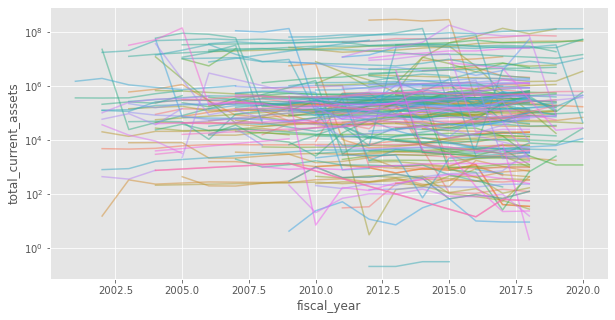

In [71]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=companies,
    x="fiscal_year",
    y="total_current_assets",
    hue="CIK",
    ax=ax,
    legend=False,
    alpha=0.5,
)
ax.set(yscale="log")
plt.show()

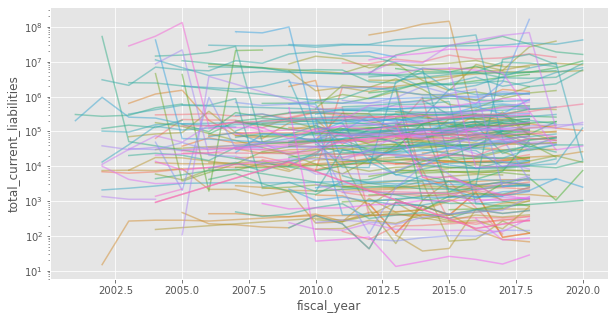

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=companies,
    x="fiscal_year",
    y="total_current_liabilities",
    hue="CIK",
    ax=ax,
    legend=False,
    alpha=0.5,
)
ax.set(yscale="log")
plt.show()

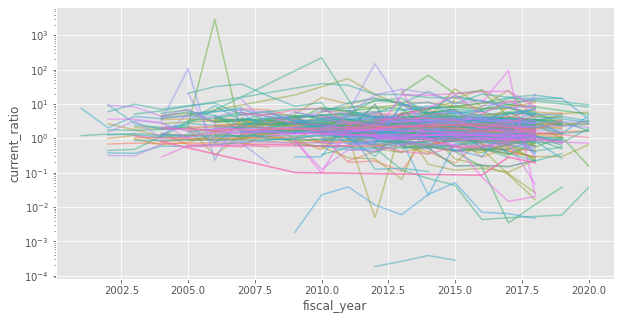

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(
    data=companies,
    x="fiscal_year",
    y="current_ratio",
    hue="CIK",
    legend=False,
    alpha=0.5,
)
ax.set(yscale="log")
plt.show()

In [148]:
# save processed company dataset
companies.to_csv('../data/processed/scraped_companies_2021.csv')